# Hannah Byrne Pset 3 - Numpy and Matplotlib

## Question 1

### 1: Creating and Manipulating Arrays

In [55]:
import numpy as np
from matplotlib import pyplot as plt

### 1.1: Create two 2D arrays representing coordinates x, y on the cartesian plan

Both should cover the range (-2, 2) and have 100 points in each direction

In [56]:
minRange = -2
maxRange = 2
points = 100

# creating one d arrays for each
x = np.linspace(minRange, maxRange, points)
y = np.linspace(minRange, maxRange, points)

# turning these into 2 d arrays
xx, yy = np.meshgrid(x,y)

### 1.2: Visualize each 2D array using pcolormesh

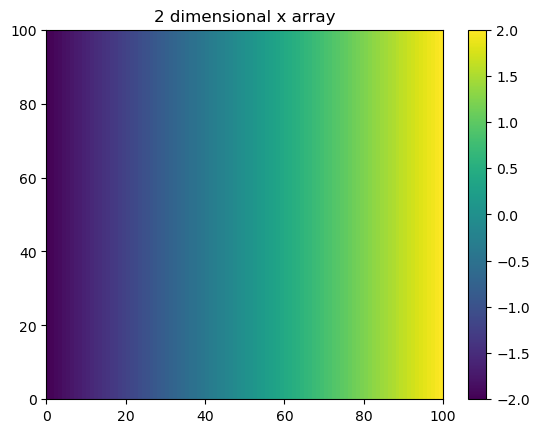

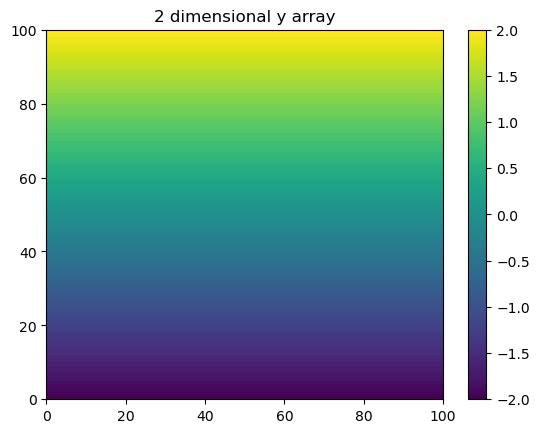

In [57]:
# visualising the xx array
plt.pcolormesh(xx)
plt.colorbar()
plt.title('2 dimensional x array')
plt.show()

# visualising the yy array
plt.pcolormesh(yy)
plt.colorbar()
plt.title('2 dimensional y array')
plt.show()

### 1.3 From your cartesian coordinates, create polar coordinates r and g

In [58]:
# from Wikipedia definition:

r = (xx**2 + yy**2)**(1/2)
g = np.arctan2(yy, xx)

### 1.4. Visualize r and g on the x,y plane

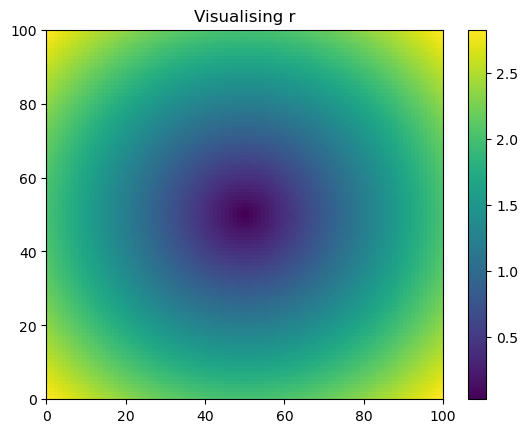

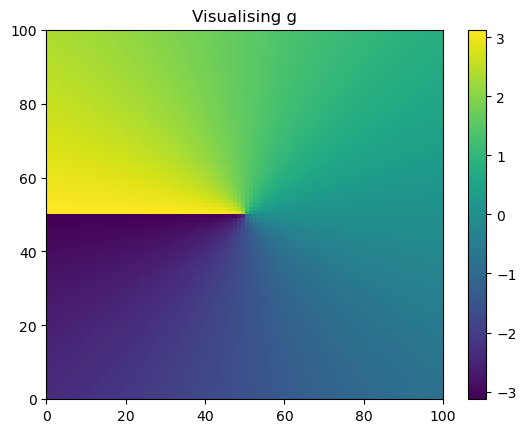

In [59]:
fig = plt.figure()
plt.pcolormesh(r)
plt.title('Visualising r')
plt.colorbar()
plt.show()

fig = plt.figure()
plt.pcolormesh(g)
plt.title('Visualising g')
plt.colorbar()
plt.show()

### 1.5: Calculate and plot f

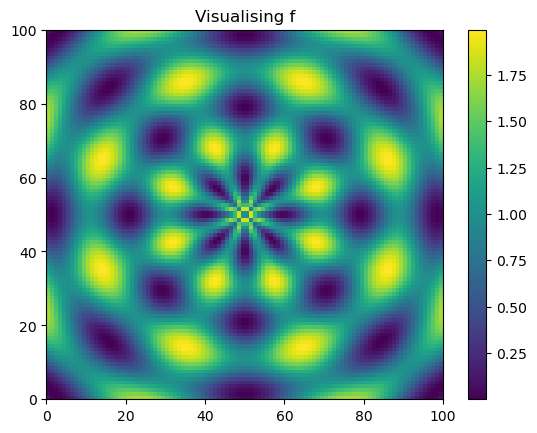

In [208]:
f = (np.cos(4*r))**2 + (np.sin(4*g))**2

# plotting it
fig = plt.figure()
plt.title('Visualising f')
plt.pcolormesh(f)
plt.colorbar()
plt.show()

### 1.6 Plot the mean of f with respect to the x axis

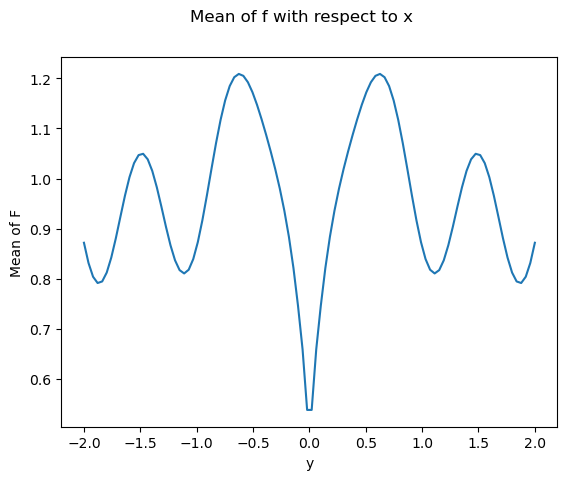

In [63]:
# calculating the mean with the axis set to 1 (i.e., it's taking the mean of every y value for each x point - which should output the same number of values as there are columns)
fMeanX = f.mean(axis = 1)

fig = plt.figure()
fig.suptitle('Mean of f with respect to x')
plt.plot(y, fMeanX)
plt.xlabel('y')
plt.ylabel('Mean of F')
plt.show()

### 1.7 Plot the mean of f with respect to the y axis

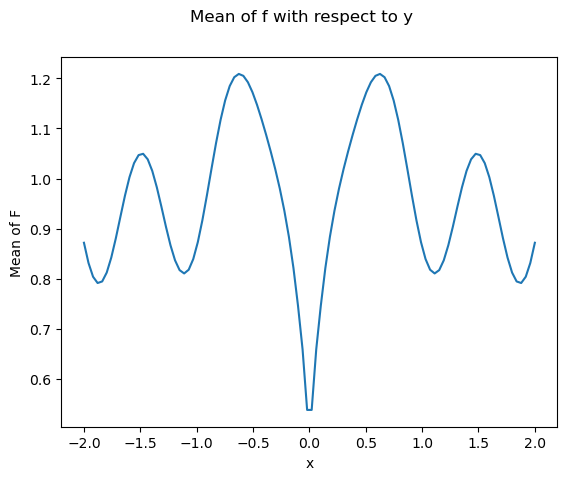

In [62]:
fMeanY = f.mean(axis = 0)

fig = plt.figure()
fig.suptitle('Mean of f with respect to y')
plt.plot(x, fMeanY)
plt.xlabel('x')
plt.ylabel('Mean of F')
plt.show()

## 1.8: Plot the mean of f with respect to g as a function of r

For this, we will need to integrate f along a range of values of g with r held constant. So for this 1) define a range of values of r that are "constant" then 2) sum up the values of f for all values of g at that constant r and divide by the number of values.

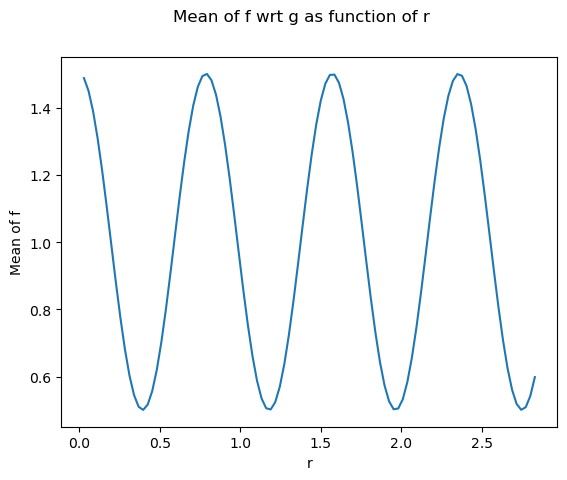

In [200]:
# setting the range of r values
# electing here for 100 values of r between the minimum and the maximum
nR = 100
rRange = np.linspace(r.min(), r.max(), nR)

# setting the range of g over which to calculate the integral; more values because the integral should have finer resolution
nG = 1000
gRange = np.linspace(g.min(), g.max(), nG)

# initialising an array that will hold the integration values as they get added to each other
# each column will be a value of r
fInt = np.zeros(len(rRange))

# initialise indices for keeping track in the array
rIndex = 0

for rPrime in rRange:
    for gPrime in gRange:
        # calculate the incremental integral for each value of gPrime in the range and add it to the integrand
        fInt[rIndex] = fInt[rIndex] + (np.cos(4*rPrime))**2 + (np.sin(4*gPrime))**2
    # then once all of the values of g have been added divide by the number of values
    fInt[rIndex] = fInt[rIndex]/len(gRange)
    rIndex+=1

# plot the results
fig = plt.figure()
fig.suptitle('Mean of f wrt g as function of r')
plt.xlabel('r')
plt.ylabel('Mean of f')
plt.plot(rRange, fInt)
plt.show()

### I will also plot f on a grid with g and r to verify that the mean of f with respect to g as a function of r should look as above

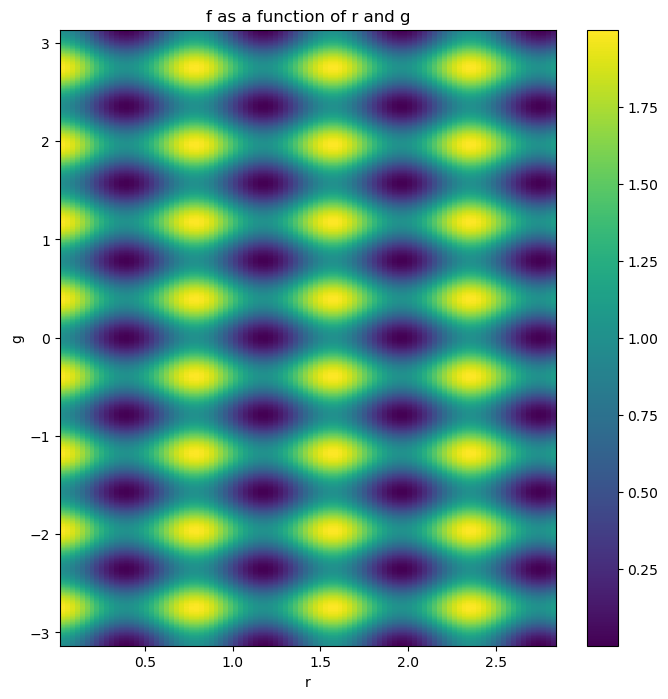

In [216]:
# calculate f as a function of g and r to visualise
gg, rr = np.meshgrid(gRange, rRange)

def CalculateF(gg,rr):
    '''
    Function that takes in 2d arrays of g and r and returns f for every point
    '''
    fOut = (np.cos(4*rr))**2 + (np.sin(4*gg))**2
    return fOut

# call the function on the grid to allow for plotting
f2 = CalculateF(gg, rr)

# plotting f
fig, ax = plt.subplots(figsize = (8,8))
plt.pcolormesh(rr,gg,f2)
plt.colorbar()
ax.set_xlabel('r')
ax.set_ylabel('g')
ax.set_title('f as a function of r and g')

plt.show()

It appears that the graph of taking the mean of f with respect to g for constant r makes sense given the above plot (e.g., there are 4 columns of what appear to be high values of f that correspond with peaks in the first figure; columns of low values also appear similarly in the first figure).

## Question 2

In [99]:
# loading the data
import pooch
url = "https://www.ldeo.columbia.edu/~rpa/float_data_4901412.zip"
files = pooch.retrieve(url, processor=pooch.Unzip(), known_hash="2a703c720302c682f1662181d329c9f22f9f10e1539dc2d6082160a469165009")
files

Unzipping contents of '/home/hb2731/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip' to '/home/hb2731/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip'


['/home/hb2731/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/date.npy',
 '/home/hb2731/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/T.npy',
 '/home/hb2731/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/S.npy',
 '/home/hb2731/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/P.npy',
 '/home/hb2731/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/levels.npy',
 '/home/hb2731/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/lon.npy',
 '/home/hb2731/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/lat.npy']

### 2.1 Load each data file as a numpy array.

In [106]:
# loading each of these files into NumPy arrays
date = np.load(files[0])
T = np.load(files[1])
S = np.load(files[2])
P = np.load(files[3])
levels = np.load(files[4])
lon = np.load(files[5])
lat = np.load(files[6])

### 2.2 Examine the shapes of T, S and P compared to lon, lat, date and level. How do you think they are related?

In [121]:
print(f'T: {T.shape[0]} x {T.shape[1]} values')
print(f'S: {S.shape[0]} x {S.shape[1]} values')
print(f'P: {S.shape[0]} x {S.shape[1]} values')
print(f'lon: {lon.shape[0]} values')
print(f'lat: {lat.shape[0]} values')
print(f'date: {date.shape[0]} values')
print(f'levels: {levels.shape[0]} values')

T: 78 x 75 values
S: 78 x 75 values
P: 78 x 75 values
lon: 75 values
lat: 75 values
date: 75 values
levels: 78 values


Based on this, I would guess that the floats routinely take one measurement at each of 78 levels; these measurements include T, S and P. Based on the length of date, I would guess that this project has been ongoing for 75 days (or at least we have data for 75 days of this). Based on the values for latitude and longitude I might guess that each day of data is estimated to be at one latitude / longitude combination (i.e., one location).

### 2.3 Make a plot for each column of data in T, S and P (three plots).

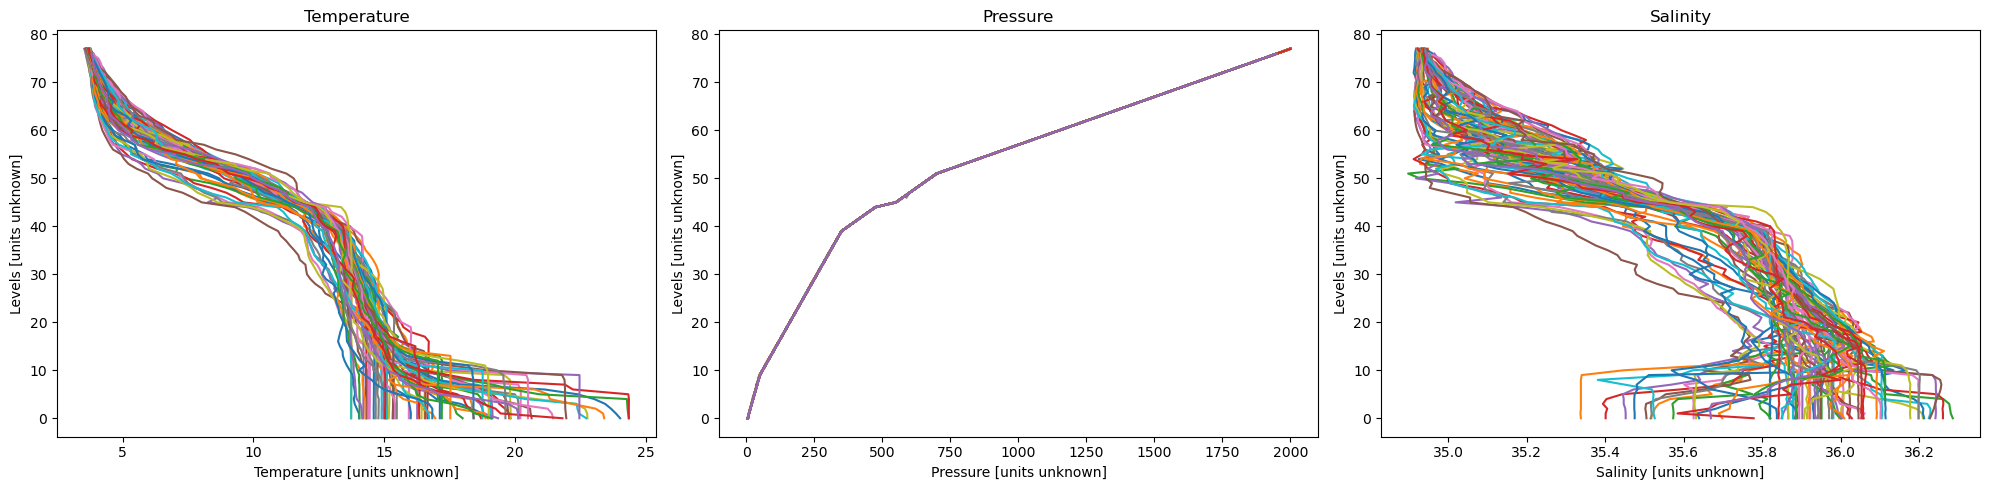

In [176]:
fig = plt.figure(figsize = (20,5))
ax = fig.add_subplot(1,3,1)
ax.set_title('Temperature')
plt.xlabel('Temperature [units unknown]')
plt.ylabel('Levels [units unknown]')
plt.plot(T, levels)

ax = fig.add_subplot(1,3,2)
ax.set_title('Pressure')
plt.xlabel('Pressure [units unknown]')
plt.ylabel('Levels [units unknown]')
plt.plot(P, levels)

ax = fig.add_subplot(1,3,3)
ax.set_title('Salinity')
plt.xlabel('Salinity [units unknown]')
plt.ylabel('Levels [units unknown]')
plt.plot(S, levels)

fig.tight_layout()
plt.show()

### 2.4 Compute the mean and standard deviation of each of T, S and P at each depth in level.

In [177]:
# if we are calculating the mean and STD for each level, we would expect 78 mean and STD values (one for each level); axis 1
meanT = T.mean(axis = 1)
meanP = P.mean(axis = 1)
meanS = S.mean(axis = 1)

stdT = T.std(axis = 1)
stdP = P.std(axis = 1)
stdS = S.std(axis = 1)

### 2.5 Now make three similar plot, but show only the mean T, S and P at each depth. Show error bars on each plot using the standard deviations.

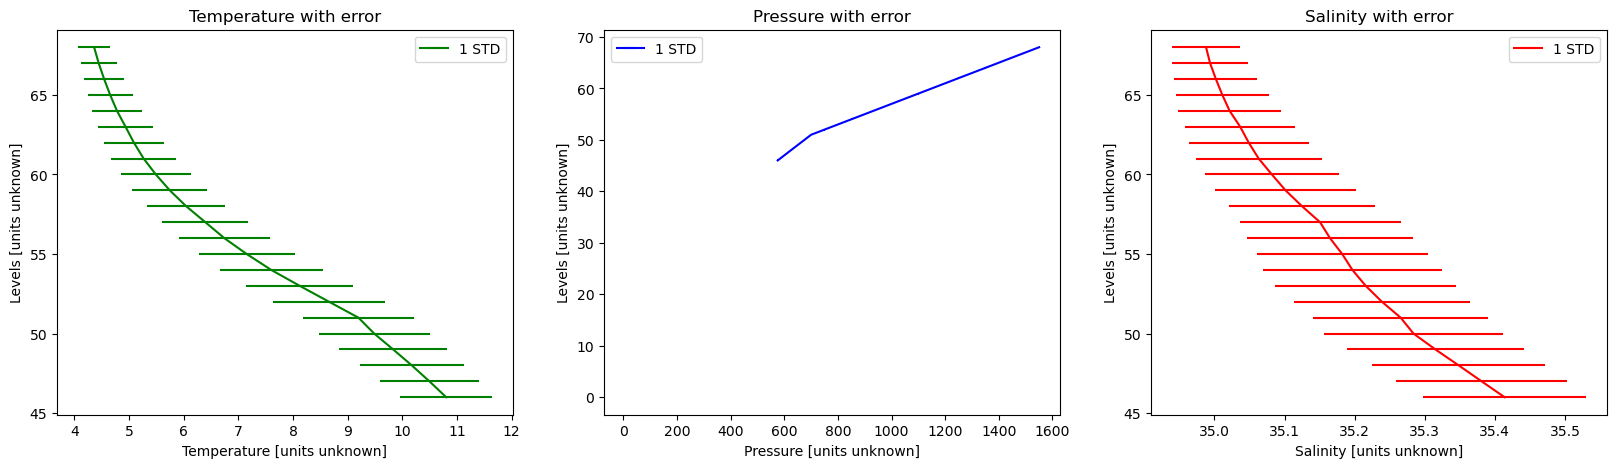

In [180]:
fig = plt.figure(figsize = (20,5))
ax = fig.add_subplot(1,3,1)
ax.set_title('Temperature with error')
plt.xlabel('Temperature [units unknown]')
plt.ylabel('Levels [units unknown]')
plt.errorbar(meanT, levels, xerr = stdT, label = '1 STD', fmt = 'g')
plt.legend()

ax = fig.add_subplot(1,3,2)
ax.set_title('Pressure with error')
plt.xlabel('Pressure [units unknown]')
plt.ylabel('Levels [units unknown]')
plt.errorbar(meanP, levels, xerr = stdP, label = '1 STD', fmt = 'b')
plt.legend()

ax = fig.add_subplot(1,3,3)
ax.set_title('Salinity with error')
plt.xlabel('Salinity [units unknown]')
plt.ylabel('Levels [units unknown]')
plt.errorbar(meanS, levels, xerr = stdS, label = '1 STD', fmt = 'r')
plt.legend()

plt.show()

### 2.6 Account For Missing Data

In [181]:
# recalculating to account for missing data
meanNanT = np.nanmean(T, axis = 1)
meanNanP = np.nanmean(P, axis = 1)
meanNanS = np.nanmean(S, axis = 1)

stdNanT = np.nanstd(T, axis = 1)
stdNanP = np.nanstd(P, axis = 1)
stdNanS = np.nanstd(S, axis = 1)

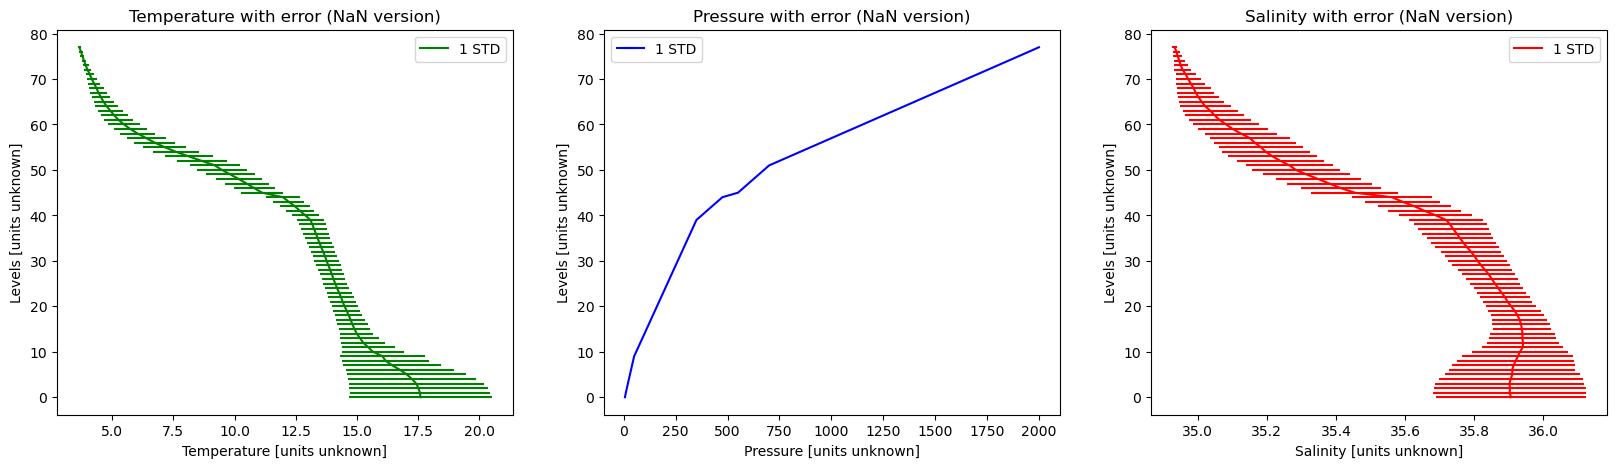

In [182]:
# plotting a new figure
fig = plt.figure(figsize = (20,5))
ax = fig.add_subplot(1,3,1)
ax.set_title('Temperature with error (NaN version)')
plt.xlabel('Temperature [units unknown]')
plt.ylabel('Levels [units unknown]')
plt.errorbar(meanNanT, levels, xerr = stdNanT, label = '1 STD', fmt = 'g')
plt.legend()

ax = fig.add_subplot(1,3,2)
ax.set_title('Pressure with error (NaN version)')
plt.xlabel('Pressure [units unknown]')
plt.ylabel('Levels [units unknown]')
plt.errorbar(meanNanP, levels, xerr = stdNanP, label = '1 STD', fmt = 'b')
plt.legend()

ax = fig.add_subplot(1,3,3)
ax.set_title('Salinity with error (NaN version)')
plt.xlabel('Salinity [units unknown]')
plt.ylabel('Levels [units unknown]')
plt.errorbar(meanNanS, levels, xerr = stdNanS, label = '1 STD', fmt = 'r')
plt.legend()

plt.show()

### 2.7 Create a scatter plot of the lon, lat positions of the ARGO float.

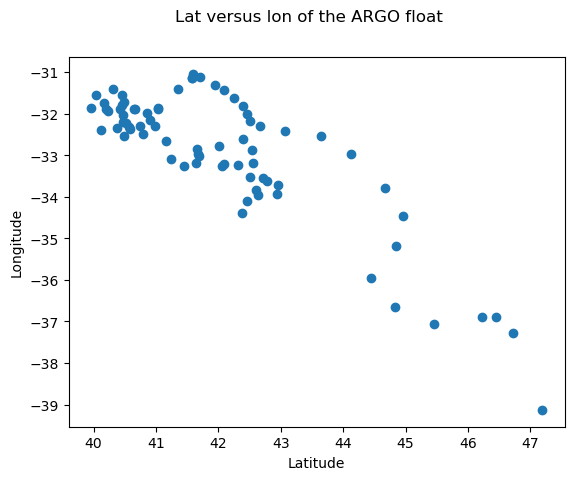

In [169]:
fig = plt.figure()
fig.suptitle('Lat versus lon of the ARGO float')
scatter = plt.scatter(lat, lon)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()